In [1]:
%pylab inline

import healpy
import matplotlib as mpl
import os
import pandas as pd

import pyslalib
from pyslalib import slalib


mpl.rcParams["savefig.dpi"] = 300
mpl.rcParams["figure.dpi"] = 150 # this is for displaying

pi = np.pi


Populating the interactive namespace from numpy and matplotlib


In [2]:


fermi  = pd.read_csv("../Resources/LightCurve/3FGL_pos.txt",delimiter="\t")
import sys
sys.path.append("../code/")
from neutrino import NuDist

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:18: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


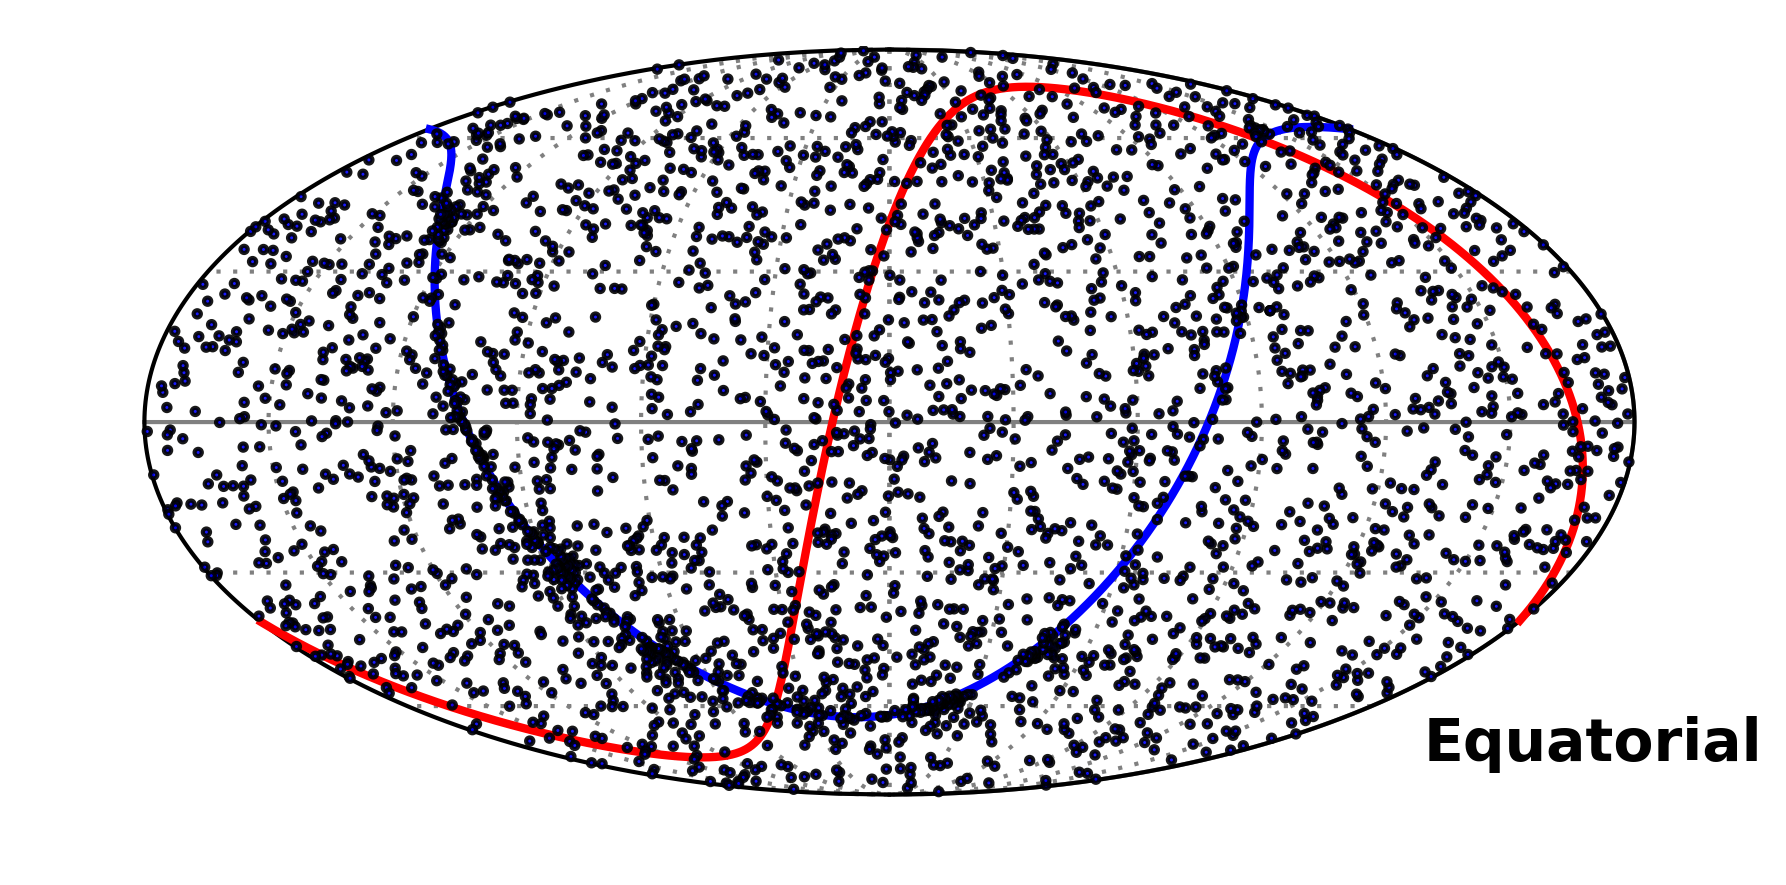

In [3]:
fig = plt.figure (1, figsize = (5.2, 3))
healpy.mollview (None, coord='C', rot=180, cbar=False, title='', fig=1)
healpy.graticule (color="gray")

# plot the galactic plane and center

galat = np.linspace (0, 2*pi, 1e3)
galon = pi/2*np.ones_like (galat)

healpy.projplot (
    galon, galat,
    coord='GC', color='blue', lw=2, zorder=4
)
healpy.projscatter (pi/2, 0, coord='GC', color='.5')
#fig.gca().scatter(galon/pi, galat/pi, color="blue")

# plot the supergalactic plane   
superlon = np.linspace (0, 2*pi, 1e3)
superlat = 0*pi*np.ones_like (superlon)
#superlon = np.linspace (0, 360., 1e3)
#superlat = 90.*np.ones_like (superlon)
#superlon, superlat = np.linspace(0., 360., 1001), np.zeros(1001)
supgal = np.vectorize(slalib.sla_supgal)
lon, lat = supgal(superlon, superlat)   

#fig.gca().scatter(lon/pi, lat/pi, color="r")
healpy.projplot (
        #lat_e, lon_e,
        lat-pi/2, lon+pi,
        coord='GC', color='r', lw=2, zorder=2 # this coord is supposed to be the coord system the POINTS ARE IN. in our case it would be supergal coords...
    )


healpy.projscatter(np.radians(fermi.dec-90.), np.radians(fermi.ra+180.), coord="C",alpha=0.9,s=3,zorder=10
                   )

plt.grid(False)


In [4]:
nudist = NuDist()
nu = nudist.get_random(1000).T
ra = nu[1]
dec = nu[0]

1000
1000


In [22]:
np.histogram([1,2,3])

(array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1]),
 array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ]))

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ]),
 <a list of 10 Patch objects>)

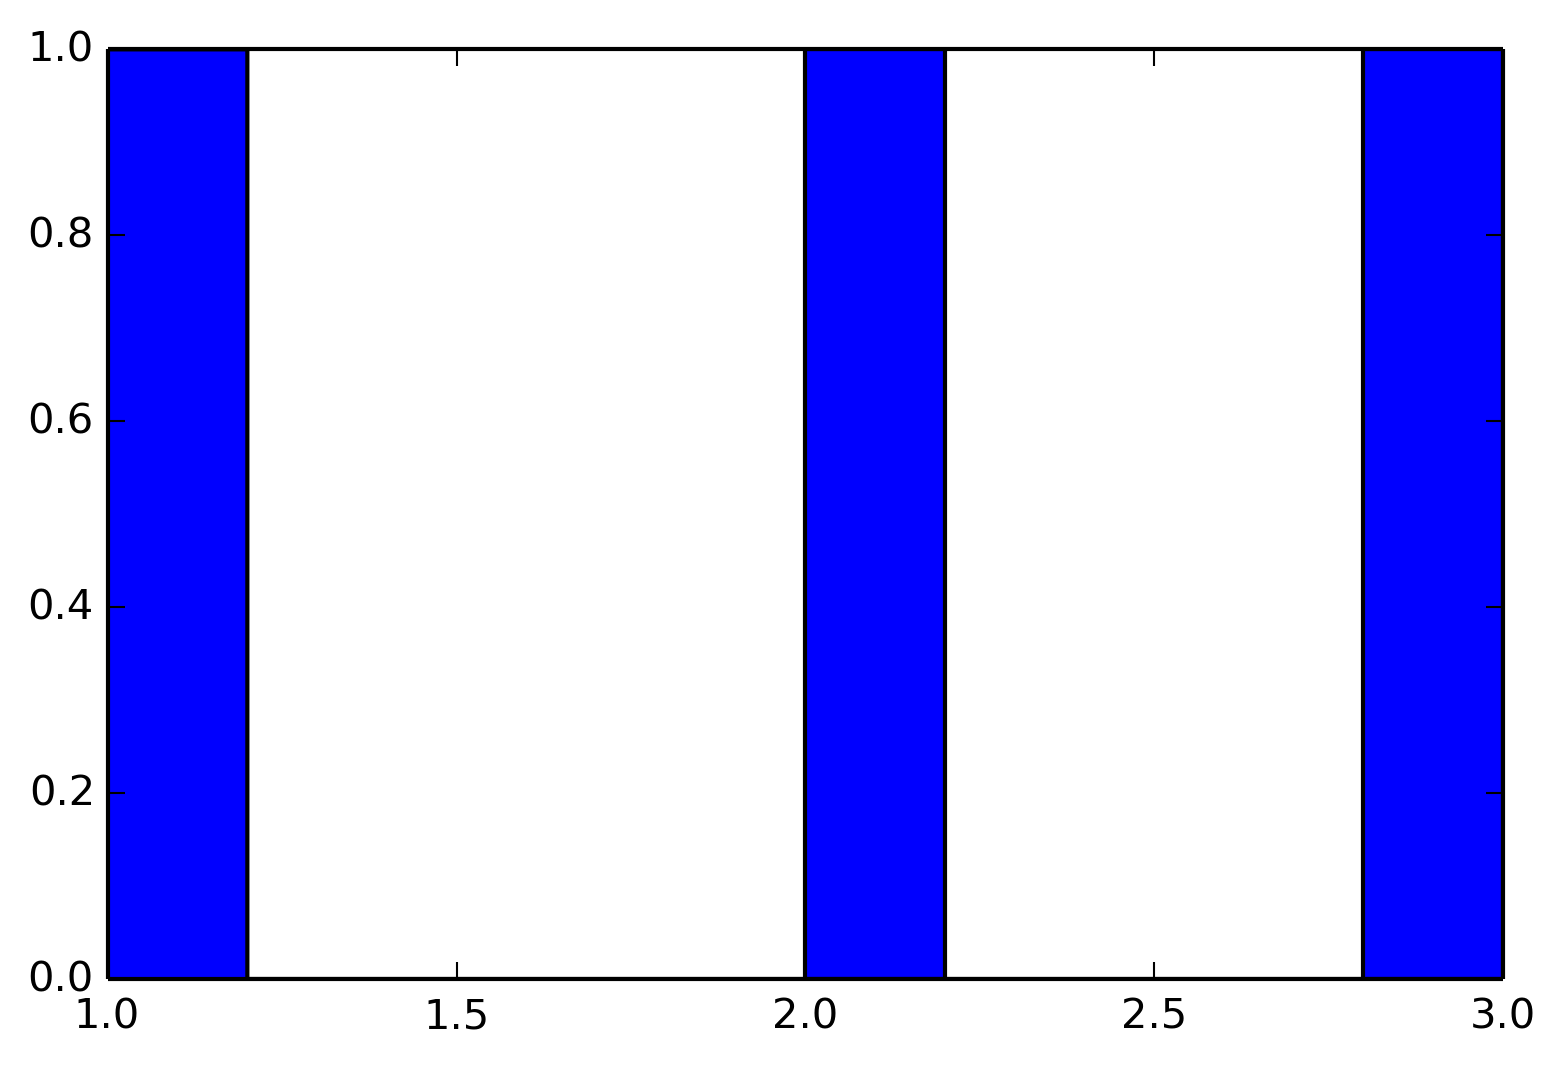

In [21]:
plt.hist([1,2,3])